## FIC 網路爬蟲

In [2]:
import requests
#print(dir(requests))
res = requests.get('http://www.flu.org.cn/scn/news')
res

<Response [200]>

In [4]:
#res.text

## PCHOME 網路爬蟲

In [5]:
import requests
res = requests.get('http://ecapi.pchome.com.tw/ecshop/prodapi/v2/prod/DEAY0N-19008BDRD-000&store=DEAY0N&fields=Seq,Id,Name,Nick,Store,PreOrdDate,SpeOrdDate,Price,Discount,Pic,Weight,ISBN,Qty,Bonus,isBig,isSpec,isCombine,isDiy,isRecyclable,isCarrier,isMedical,isBigCart,isSnapUp,isDescAndIntroSync,isFoodContents,isHuge,isEnergySubsidy&_callback=jsonp_prod&1503028800?_callback=jsonp_prod')
res.text

'try{jsonp_prod({"DEAY0N-19008BDRD-000":{"Seq":18457501,"Id":"DEAY0N-19008BDRD-000","Name":"\\u5fb7\\u570bBRITA 3.5\\u516c\\u5347Aluna XL\\u611b\\u5974\\u5a1c\\u900f\\u8996\\u578b\\u6ffe\\u6c34\\u58fa\\u3010\\u542b1\\u6ffe\\u82af\\u3011+ MAXTRA Plus 12\\u5165\\u6ffe\\u82af","Nick":"<font color=#FF00CC><b>\\u25bc\\u6bcf\\u65e5\\u5f37\\u6a94\\u2027\\u760b\\u6bba\\u7279\\u8ce3\\u25bc<\\/font><\\/b><BR>\\u5fb7\\u570bBRITA 3.5\\u516c\\u5347Aluna XL\\u611b\\u5974\\u5a1c\\u900f\\u8996\\u578b\\u6ffe\\u6c34\\u58fa\\u3010\\u542b1\\u6ffe\\u82af\\u3011+ MAXTRA Plus 12\\u5165\\u6ffe\\u82af","Store":"DEAY0N","PreOrdDate":"","SpeOrdDate":"","Price":{"M":4030,"P":2760},"Discount":0,"Pic":{"B":"\\/items\\/DEAY0N19008BDRD\\/000001_1503022008.jpg","S":"\\/items\\/DEAY0N19008BDRD\\/000002_1503022008.jpg"},"Weight":0,"ISBN":"","Qty":0,"Bonus":0,"isBig":0,"isSpec":0,"isCombine":1,"isDiy":0,"isRecyclable":0,"isCarrier":0,"isMedical":0,"isBigCart":1,"isSnapUp":0,"isDescAndIntroSync":1,"isFoodContents":0,"isHu

## 抓CDC 台灣

In [7]:
import requests
res = requests.get('http://www.cdc.gov.tw/disease.aspx?nowtreeid=dec84a2f0c6fac5b&treeid=8d54c504e820735b')
#res.text

## 抓CDC 美國

In [10]:
import requests
res = requests.get('https://www.cdc.gov/', verify=False)
#res.text

C:\ProgramData\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


## 抓高鐵時刻表

In [12]:
import requests
url = 'https://www.thsrc.com.tw/tw/TimeTable/SearchResult'
payload = {
 'StartStation':'977abb69-413a-4ccf-a109-0272c24fd490',
 'EndStation':'fbd828d8-b1da-4b06-a3bd-680cdca4d2cd',
 'SearchDate':'2017/08/18',
 'SearchTime':'12:30',
 'SearchWay':'DepartureInMandarin'   
}

res = requests.post(url , data = payload)
#res.text

## 台鐵時刻表
- http://twtraffic.tra.gov.tw/twrail/EasySearch.aspx

In [19]:
import requests
res = requests.get('http://twtraffic.tra.gov.tw/twrail/SearchResult.aspx?searchtype=0&searchdate=2017/08/18&fromstation=1810&tostation=1008&trainclass=%271100%27,%271101%27,%271102%27,%271107%27,%271110%27,%271120%27&fromtime=0600&totime=2359')
res
type(res)

requests.models.Response

## 資料剖析

In [17]:
from bs4 import BeautifulSoup
html_sample = '''
<html>
    <body>
        <h1 id="title"> Hello World</h1>
        <a href="#" class='link'> THIS IS LINK1</a>
        <a href="#2" class='link'> THIS IS LINK2</a>
    </body>
</html>
'''

In [22]:
soup = BeautifulSoup(html_sample, 'html.parser')
soup.text
type(soup)

bs4.BeautifulSoup

In [25]:
alink = soup.select('a')

In [27]:
type(alink)
type(alink[0])

bs4.element.Tag

In [30]:
soup.select('a')[0].text

' THIS IS LINK1'

In [32]:
soup.select('a')[1].text

' THIS IS LINK2'

In [37]:
print(soup.select('h1'))
print(soup.select('h1')[0])
print(soup.select('h1')[0].text)

[<h1 id="title"> Hello World</h1>]
<h1 id="title"> Hello World</h1>
 Hello World


In [38]:
soup.select('h2')

[]

In [46]:
print(soup.select('h1'))

# id => #
print(soup.select('#title'))

print(soup.select('h1#title'))

print(soup.select('body h1'))

[<h1 id="title"> Hello World</h1>]
[<h1 id="title"> Hello World</h1>]
[<h1 id="title"> Hello World</h1>]
[<h1 id="title"> Hello World</h1>]


In [45]:
print(soup.select('a'))

# class => .
print(soup.select('.link'))

print(soup.select('a.link'))

[<a class="link" href="#"> THIS IS LINK1</a>, <a class="link" href="#2"> THIS IS LINK2</a>]
[<a class="link" href="#"> THIS IS LINK1</a>, <a class="link" href="#2"> THIS IS LINK2</a>]
[<a class="link" href="#"> THIS IS LINK1</a>, <a class="link" href="#2"> THIS IS LINK2</a>]


In [49]:
alink = soup.select('a')
for link in alink:
    #print(link.text)
    print(link['href'])

#
#2


## FIC 抓取實務 Part 1

In [51]:
import requests
res = requests.get('http://www.flu.org.cn/tcn/news')
#res.text

In [52]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser') # html.parser, html5lib, lxml

In [55]:
for title in soup.select('.title3 a'):
    print(title.text)

中國：湖南省湘西自治州報告一例人感染H7N9流感確診病例
中國：香港衛生防護中心獲通報福建人類感染甲型禽流感（H7N9）個案
中國：內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流感疫情
中國：2017年6月全國動物H7N9流感監測情況
中國：香港衛生防護中心獲通報江蘇人類感染甲型禽流感(H7N9)個案
中國：新疆報告1例H7N9流感病例
中國：雲南省文山市確診4例H7N9病例
中國：河北省H7N9疫情通報（6月16日~6月22日）
文獻：反向遺傳操作文獻合集（中文）
中國：貴陽市白雲區確診1例人感染H7N9流感病例
中國：四川省報告兩例人感染H7N9流感病例（眉山市和內江市）
中國：天津市確診一例H7N9病例
中國：四川省攀枝花市報告1例H7N9流感病例
中國：2017年5月全國動物H7N9流感監測情況
中國：河北省H7N9疫情通報（6月9日~6月15日）
中國：廣西百色市報告一例人感染H7N9病例
中國：黑龍江省雙鴨山市寶清縣家禽H7N9流感疫情
中國：江蘇省報告1例人感染H7N9病例
中國：內蒙古包頭市九原區發生一起家禽H7N9流感疫情
中國：河北省H7N9疫情通報（6月2日~6月8日）


## InfoLite
 - https://chrome.google.com/webstore/detail/infolite/ipjbadabbpedegielkhgpiekdlmfpgal

## 抓取圖片

In [56]:
import requests
res = requests.get('http://www.flu.org.cn/upfile/images/global.gif')
with open('global.gif', 'wb') as f:
    f.write(res.content)

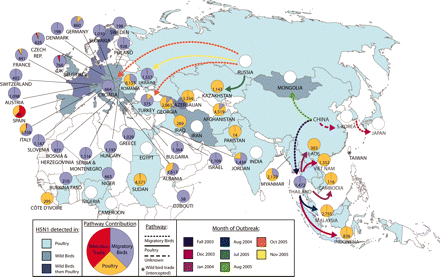

In [57]:
from PIL import Image
Image.open('global.gif')

## 下載所有PDF

In [58]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.cdc.gov/mmwr/index2016.html')
soup  = BeautifulSoup(res.text, 'html.parser')

In [ ]:
domain = 'https://www.cdc.gov'
for alink in soup.select('a'):
    if alink.get('href') and 'pdf' in alink['href']:
        res = requests.get(domain + alink['href'])
        with open(alink['href'].split('/')[-1], 'wb') as f:
            f.write(res.content)

## FIC 抓取實務 Part 2

In [65]:
import requests
res = requests.get('http://www.flu.org.cn/tcn/news')

In [66]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [82]:
domain = 'http://www.flu.org.cn/tcn/'
for news in soup.select('p'):
    #print(news)
    if news.select('.title3 a'):
        title = news.select('.title3 a')[0].text
        link  = domain + news.select('a')[0]['href']
        content  = news.select('.article_note')[0].text
        print('==========================')
        print(title, link, content)

中國：湖南省湘西自治州報告一例人感染H7N9流感確診病例 http://www.flu.org.cn/tcn/news-19596.html     2017年8月14日，湘西自治州報告一例人感染H7N9流感確診病例。患者莫某某，48歲，以收廢品為業，現居住於吉首市，有高血壓病史。患者於8月9日發病，13日經醫院搶救無效死亡。患者標本經湘西自治州疾控中...
中國：香港衛生防護中心獲通報福建人類感染甲型禽流感（H7N9）個案 http://www.flu.org.cn/tcn/news-19586.html 衛生署衛生防護中心今日（八月四日）正監察國家衛生和計劃生育委員會通報在七月二十八日至八月三日期間，福建新增一宗人類感染甲型禽流感（H7N9）個案，並強烈呼籲市民，不論在本地或外遊期間，應時刻保持個人、食物和環境衛生。　　該名福建58歲男病人曾...
中國：內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流感疫情 http://www.flu.org.cn/tcn/news-19584.html 農業部新聞辦公室8月1日發布，內蒙古自治區通遼市科爾沁區發生一起家禽H5N1亞型高致病性禽流感疫情。　　7月28日，內蒙古自治區通遼市科爾沁區獸醫部門在監測中發現一養殖場飼養的蛋雞出現疑似禽流感症狀，發病35000只，死亡15000只。7月2...
中國：2017年6月全國動物H7N9流感監測情況 http://www.flu.org.cn/tcn/news-19582.html 有關陽性樣品說明： 
　 　一、H7亞型禽流感血清學陽性樣品（3018份）
　　（一）北京市。雞樣品2059份，來自豐台區、密雲區、平穀區、延慶區、房山區、昌平區、門頭溝區、順義區的675個養雞場（戶）。鴨樣品2份，來自順義區某養殖戶。鴿...
中國：香港衛生防護中心獲通報江蘇人類感染甲型禽流感(H7N9)個案 http://www.flu.org.cn/tcn/news-19578.html 香港衛生署衛生防護中心（七月二十一日）正監察國家衛生和計劃生育委員會通報在七月十四至二十日期間，江蘇新增一宗人類感染甲型禽流感（H7N9）個案，並強烈呼籲市民，不論在本地或外遊期間，應時刻保持個人、食物和環境衛生。　　該名南京62歲女病人曾到...
中國：新疆報告1例H7N9流感病例 http

In [84]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://www.flu.org.cn/tcn/news-19596.html')
soup = BeautifulSoup(res.text, 'html.parser')


In [94]:
soup.select('.title2')[0].text
soup.select('.article_property a')[0].text
soup.select('.article_property .time')[0].text
soup.select('.article_property strong')[0].text
soup.select('.article_content')[0].text.strip()

'2017年8月14日，湘西自治州報告一例人感染H7N9流感確診病例。患者莫某某，48歲，以收廢品為業，現居住於吉首市，有高血壓病史。患者於8月9日發病，13日經醫院搶救無效死亡。患者標本經湘西自治州疾控中心、湖南省疾控中心實驗室檢測和複核為H7N9流感病毒核酸陽性。\xa0\xa0\xa0 專家提醒，目前雖天氣炎熱，仍可能會出現人感染H7N9流感散發病例，敬請廣大群眾做好預防措施。'

In [95]:
def pageDetail(detailurl):
    res     = requests.get(detailurl)
    soup    = BeautifulSoup(res.text, 'html.parser')
    title   = soup.select('.title2')[0].text
    author  = soup.select('.article_property a')[0].text
    dt      = soup.select('.article_property .time')[0].text
    source  = soup.select('.article_property strong')[0].text
    content = soup.select('.article_content')[0].text.strip()
    return {'title':title, 'author':author, 'dt':dt, 'source':source, 'content':content}


In [96]:
pageDetail('http://www.flu.org.cn/tcn/news-19570.html')

{'author': 'kickingbird',
 'content': '6月20日-7月4日，新疆建設兵團報告1例H7N9流感病例。6月30日，新疆建設兵團第七師醫院報告的一例不明原因肺炎病例，經兵團疾控中心實驗室和自治區疾控中心實驗室檢測均為H7N9病毒核酸陽性，6月30日23點29分患者因搶救無效死亡。此病例為2017年兵團首例確診H7N9病例。疫情發生後，兵團高度重視，組成兵地聯防聯控工作組，指導疫情防控，新疆建設兵團衛生局及時調集兵團專家全力救治患者，開展疫情處置工作。目前，醫學觀察139人，未發現人傳人的情況。\n\n\n\n相關文獻：\n1、2013~2016年兵團第六師環境和職業暴露人群禽流感監測分析. 疾病預防控制通報\n2、2012年~2015年新疆兵團禽流感外環境監測. 中國衛生檢驗雜志 2017年02期\n3、2009年～2011年新疆野生鳥類禽流感流行病學調查與分析. 中國畜牧獸醫學會禽病學分會第十六次學術研討會論文集\n4、新疆巴州地區流感病毒實驗室檢測分析. 中國公共衛生 2011年01期\n5、新疆主要野生鳥類的生態環境、遷徙路線及其對禽流感發生與流行的影響. 動物醫學進展 2013年07期',
 'dt': '2017年7月8日15点58分',
 'source': '新疆建設兵團衛生局',
 'title': '中國：新疆報告1例H7N9流感病例'}